In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import subprocess

## Plot

In [7]:
def plot_graphs(listX, listY, labelX, labelY, out='nothing', t='nothing'):
    fig, ax = plt.subplots()
    
    plt.plot(listX, listY, linewidth=3.0)

    ax.set_xlabel(labelX, fontsize='xx-large', labelpad=25, weight='semibold')
    ax.set_ylabel(labelY, fontsize='xx-large', labelpad=25, weight='semibold')
    
    ax.set_ylim(0, 1)

    plt.tick_params(axis='both', labelsize=20, pad=25)

    # for tick in ax.xaxis.get_ticklabels():
    #    tick.set_fontsize('x-large')
    #    tick.set_weight('bold')

    # for tick in ax.yaxis.get_ticklabels():
    #    tick.set_fontsize('x-large')
    #    tick.set_weight('bold')

    plt.tight_layout()

    if t != 'nothing':
        plt.title(t, fontsize='xx-large', weight='semibold')

    #plt.savefig(out)
    plt.show()

### Load Test Dataset ML1M

In [8]:
filein = open('Datasets/ML-1M/ratings_test.txt', 'r')

u_rating_test = {}
for line in filein:
    line = line.strip()
    try:
        values = line.split("::")
        u_id = values[0]
        i_id = values[1]
        r = values[2]
        
        if not u_rating_test.get(u_id, False):
            u_rating_test[u_id] = {}
        u_rating_test[u_id][i_id] = r
        
    except:
        print(line)

### Load Recommender List and Evaluation

In [9]:
recs_list = ['rec_itemKNN_5', 'rec_itemKNN_10', 'rec_itemKNN_20']

1.0


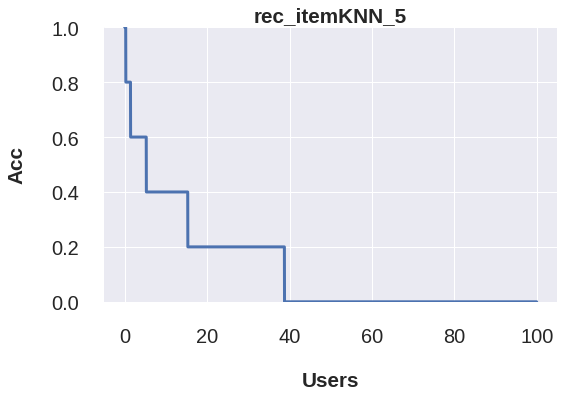

1.0


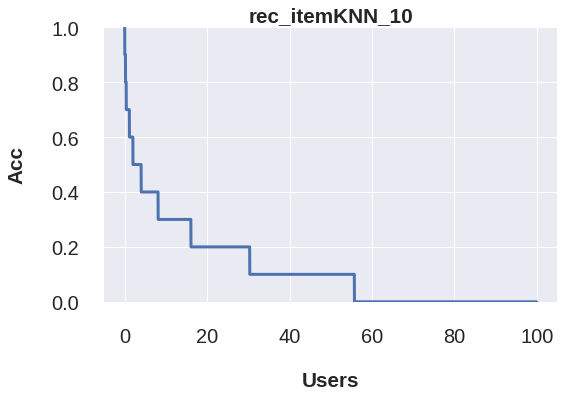

0.95


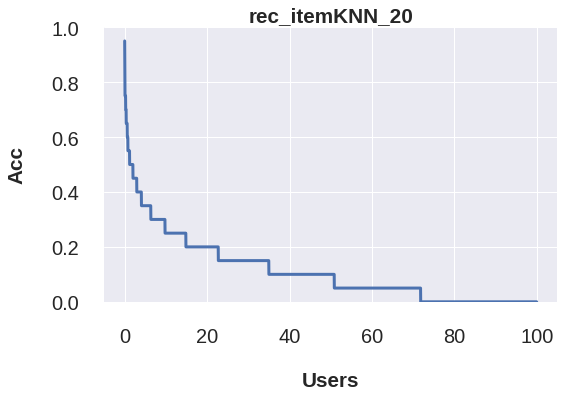

In [10]:
for rec_list in recs_list:
    filein = open("Recommendations Lists/" +rec_list+ ".txt", 'r')

    u_rating_pred = {}
    for line in filein:
        line = line.strip()
        try:
            values = line.split("\t")
            u_id = values[0]
            values = values[1].split(",")
        
            for i in values:
                v = i.split(":")
                i_id = v[0]
                r = v[1]

                if not u_rating_pred.get(u_id, False):
                    u_rating_pred[u_id] = {}
                u_rating_pred[u_id][i_id] = r
        
        except:
            print(line)
            
    ################
    ### ACCURACY ###
    ################

    fileout = open("Evaluations/Standard/" +rec_list+ "_acc.txt", 'w')

    u_acc = {}
    acc_average = 0
    for i,user in enumerate(u_rating_pred):
        u_acc[user] = 0
        for j, item in enumerate(u_rating_pred[user]):
            if u_rating_test[user].get(item, False):
                u_acc[user] += 1

        u_acc[user] /= len(u_rating_pred[user].keys())
        acc_average += u_acc[user]
    acc_average /= len(u_acc.keys())

    fileout.write("%f\n" % (acc_average))
    fileout.write("-------------------------------\n")
    fileout.write("%f\n" % (np.median(u_acc[user])))
    fileout.write("-------------------------------\n")
    for i, v in enumerate(u_acc):
        fileout.write("%s\t%f\n" % (v, u_acc[v]))

    #plot
    listY = list(u_acc.values())
    listY.sort(reverse=True)
    print(listY[0])
    plot_graphs((np.arange(len(u_acc.keys())) / len(u_acc.keys())) * 100, listY, "Users", "Acc", out='nothing', t=rec_list)


## Diversity

In [18]:
command = "cd frameworks/vargas/src/ && make && ./getMetrics " \
              "-b ../../../Datasets/ML-1M/ratings_train.txt " \
              "-p ../../../Recommendations\ Lists/" +rec_list+ ".txt " \
              "-o ../../../Evaluations/Standard/" +rec_list+ "_div.txt " \
              "-l ../../../Datasets/ML-1M/ratings_test.txt "\
              "-n 20 "\
              " && make clean"
print(command)
subprocess.call(command, shell=True)

cd frameworks/vargas/src/ && make && ./getMetrics -b ../../../Datasets/ML-1M/ratings_train.txt -p ../../../Recommendations\ Lists/rec_itemKNN_20.txt -o ../../../Evaluations/Standard/rec_itemKNN_20_div.txt -l ../../../Datasets/ML-1M/ratings_test.txt -n 20  && make clean


0